In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join, isfile
from os import path, scandir, listdir

from source.aggregated_stats import process_details, full_stats
import source.explore as exp

pd.set_option("max_columns", 300)

In [2]:
def list_all_files(location='../input/', pattern=None, recursive=True):
    """
    This function returns a list of files at a given location (including subfolders)
    
    - location: path to the directory to be searched
    - pattern: part of the file name to be searched (ex. pattern='.csv' would return all the csv files)
    - recursive: boolean, if True the function calls itself for every subdirectory it finds
    """
    subdirectories= [f.path for f in scandir(location) if f.is_dir()]
    files = [join(location, f) for f in listdir(location) if isfile(join(location, f))]
    if recursive:
        for directory in subdirectories:
            files.extend(list_all_files(directory))
    if pattern:
        files = [f for f in files if pattern in f]
    return files

In [3]:
men_comp = list_all_files('data/raw_men/')

In [4]:
men_comp

['data/raw_men/MEvents2019.csv',
 'data/raw_men/MEvents2018.csv',
 'data/raw_men/MEvents2017.csv',
 'data/raw_men/MSampleSubmissionStage1_2020.csv',
 'data/raw_men/MEvents2015.csv',
 'data/raw_men/MEvents2016.csv',
 'data/raw_men/MPlayers.csv',
 'data/raw_men/MDataFiles_Stage1/MConferenceTourneyGames.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneySeeds.csv',
 'data/raw_men/MDataFiles_Stage1/Conferences.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv',
 'data/raw_men/MDataFiles_Stage1/Cities.csv',
 'data/raw_men/MDataFiles_Stage1/MSeasons.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneySlots.csv',
 'data/raw_men/MDataFiles_Stage1/MTeamConferences.csv',
 'data/raw_men/MDataFiles_Stage1/MSecondaryTourneyTeams.csv',
 'data/raw_men/MDataFiles_Stage1/MGameCities.csv',
 'data/raw_men/MDataFiles_Stage1/MTeamCoaches.csv',
 'data/raw_men/MDataFiles_Stage1/MTeams.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneyCompactResults.csv',
 'data/raw_men/MDataFiles_Stage1/

# submission file

In [5]:
[col for col in men_comp if 'Submission' in col]

['data/raw_men/MSampleSubmissionStage1_2020.csv']

In [6]:
df = pd.read_csv('data/raw_men/MSampleSubmissionStage1_2020.csv')
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

ID  Pred  year Team_1 Team_2
0  2015_1107_1112   0.5  2015   1107   1112
1  2015_1107_1116   0.5  2015   1107   1116
2  2015_1107_1124   0.5  2015   1107   1124
3  2015_1107_1125   0.5  2015   1107   1125
4  2015_1107_1129   0.5  2015   1107   1129

In [7]:
df.year.value_counts(dropna=False)

2015    2278
2019    2278
2018    2278
2017    2278
2016    2278
Name: year, dtype: int64

# Teams.csv

In [8]:
[file for file in men_comp if 'Teams.csv' in file]

['data/raw_men/MDataFiles_Stage1/MSecondaryTourneyTeams.csv',
 'data/raw_men/MDataFiles_Stage1/MTeams.csv']

In [9]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage1/MTeams.csv')
print(df.shape)
df.head()

(367, 4)


TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2020
1    1102    Air Force           1985          2020
2    1103        Akron           1985          2020
3    1104      Alabama           1985          2020
4    1105  Alabama A&M           2000          2020

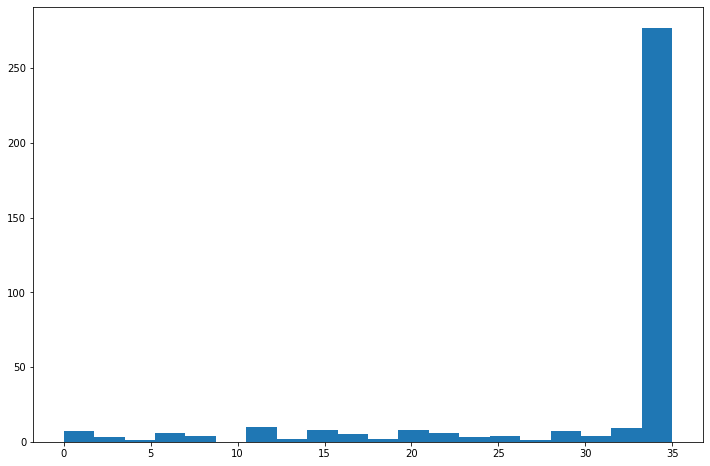

In [10]:
df['years_in_d1'] = df['LastD1Season'] - df['FirstD1Season']

df['years_in_d1'].hist(bins=20, figsize=(12,8))
plt.grid(False)

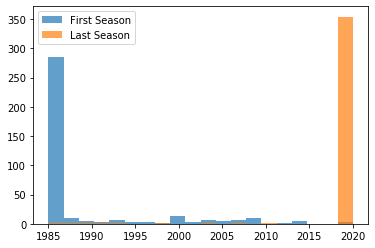

In [11]:
df.FirstD1Season.hist(bins=20, alpha=0.7, label='First Season')
df.LastD1Season.hist(bins=20, alpha=0.7, label='Last Season')
plt.grid(False)
plt.legend()

In [12]:
yr_count = pd.DataFrame({'year': np.arange(1985, 2020)})

for year in yr_count.year:
    df['is_in'] = 0
    df.loc[(df.FirstD1Season <= year) & (df.LastD1Season >= year), 'is_in'] = 1
    tot_teams = df.is_in.sum()
    yr_count.loc[yr_count.year == year, 'n_teams'] = tot_teams

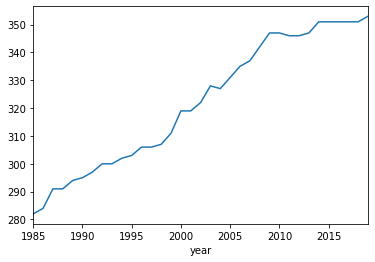

In [13]:
yr_count = yr_count.set_index('year')
yr_count.n_teams.plot()

In [14]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage1/MSecondaryTourneyTeams.csv')
print(df.shape)
df.head()

(1642, 3)


Season SecondaryTourney  TeamID
0    1985              NIT    1108
1    1985              NIT    1133
2    1985              NIT    1139
3    1985              NIT    1145
4    1985              NIT    1151

In [15]:
df.SecondaryTourney.value_counts()

NIT    1160
CIT     282
CBI     192
V16       8
Name: SecondaryTourney, dtype: int64

# Seasons.csv

In [16]:
[file for file in men_comp if 'Seasons.csv' in file]

['data/raw_men/MDataFiles_Stage1/MSeasons.csv']

In [17]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage1/MSeasons.csv')
print(df.shape)
df.head()

(36, 6)


Season     DayZero RegionW    RegionX    RegionY    RegionZ
0    1985  10/29/1984    East       West    Midwest  Southeast
1    1986  10/28/1985    East    Midwest  Southeast       West
2    1987  10/27/1986    East  Southeast    Midwest       West
3    1988   11/2/1987    East    Midwest  Southeast       West
4    1989  10/31/1988    East       West    Midwest  Southeast

In [18]:
df.RegionW.value_counts()

East           32
Atlanta         2
Albuquerque     1
TBD1            1
Name: RegionW, dtype: int64

In [19]:
df.RegionX.value_counts()

Midwest      11
West          9
South         8
Southeast     4
Oakland       1
Phoenix       1
Chicago       1
TBD2          1
Name: RegionX, dtype: int64

In [20]:
df.RegionY.value_counts()

Midwest           20
South              6
Southeast          6
TBD3               1
Minneapolis        1
Austin             1
EastRutherford     1
Name: RegionY, dtype: int64

In [21]:
df.RegionZ.value_counts()

West            23
South            4
Southeast        4
TBD4             1
WashingtonDC     1
Syracuse         1
Southwest        1
StLouis          1
Name: RegionZ, dtype: int64

# Regular season compact results

In [22]:
[file for file in men_comp if 'RegularSeasonCompact' in file]

['data/raw_men/MDataFiles_Stage1/MRegularSeasonCompactResults.csv']

In [23]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
print(df.shape)
df.head()

(161552, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0

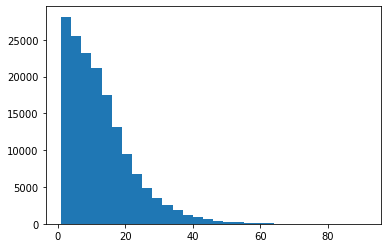

In [24]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)
plt.grid(False)

In [25]:
df.describe()

Season         DayNum        WTeamID         WScore  \
count  161552.000000  161552.000000  161552.000000  161552.000000   
mean     2003.228731      74.665359    1286.919004      76.795125   
std        10.058660      33.670352     104.521630      12.066260   
min      1985.000000       0.000000    1101.000000      34.000000   
25%      1995.000000      47.000000    1198.000000      69.000000   
50%      2004.000000      77.000000    1284.000000      76.000000   
75%      2012.000000     103.000000    1380.000000      84.000000   
max      2019.000000     132.000000    1466.000000     186.000000   

             LTeamID         LScore          NumOT     point_diff  
count  161552.000000  161552.000000  161552.000000  161552.000000  
mean     1282.637498      64.692526       0.045137      12.102599  
std       104.742961      11.349610       0.249751       9.414861  
min      1101.000000      20.000000       0.000000       1.000000  
25%      1191.000000      57.000000       0.000000       5.000000  
50%      1280.000000      64.000000       0.000000      10.000000  
75%      1375.000000      72.000000       0.000000      17.000000  
max      1466.000000     150.000000       6.000000      91.000000

In [26]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1985            37         142    74.723040             74          27   
1986            35         151    74.813640             74          30   
1987            43         133    77.993870             77          25   
1988            40         152    79.773704             79          31   
1989            43         181    81.728511             81          30   
1990            36         173    80.846477             80          28   
1991            42         186    82.733932             82          27   
1992            41         159    79.992004             79          25   
1993            40         155    79.508790             79          27   
1994            43         150    81.160345             80          33   
1995            46         156    80.096149             79          32   
1996            41         142    78.205483             77          28   
1997            42         137    76.300842             76          21   
1998            38         153    77.229902             76          31   
1999            43         132    76.043581             75          27   
2000            37         143    76.310467             76          26   
2001            35         130    77.088650             77          31   
2002            40         133    76.963557             76          23   
2003            42         142    75.795061             75          24   
2004            37         122    74.971122             75          23   
2005            37         123    74.693690             74          22   
2006            39         129    74.587555             74          21   
2007            40         129    74.829467             74          27   
2008            39         129    74.962425             74          20   
2009            38         127    74.033721             73          22   
2010            43         134    74.652480             74          30   
2011            36         121    74.374190             74          30   
2012            40         124    73.379973             73          27   
2013            34         120    72.840789             72          25   
2014            44         126    76.101268             75          25   
2015            38         126    72.680799             72          26   
2016            40         144    78.295958             78          25   
2017            43         131    78.645783             78          27   
2018            44         132    79.080296             79          31   
2019            42         139    77.887424             77          24   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1985           140    63.860316             64          0          3   
1986           114    63.633888             63          0          2   
1987           111    66.770626             66          0          3   
1988           133    67.697092             67          0          2   
1989           150    69.530840             69          0          2   
1990           141    68.833622             68          0          3   
1991           140    70.057240             69          0          2   
1992           116    67.144657             67          0          3   
1993           112    67.301858             67          0          2   
1994           125    68.561330             68          0          3   
1995           132    67.394898             67          0          3   
1996           127    65.737506             65          0          3   
1997           111    63.742238             63          0          2   
1998           121    64.612911             64          0          2   
1999           123    63.427996             63          0          3   
2000           126    63.870768             6

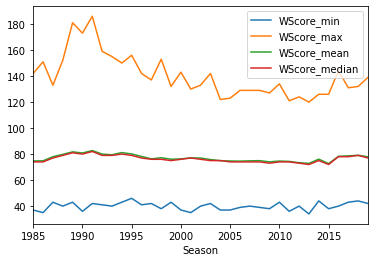

In [27]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

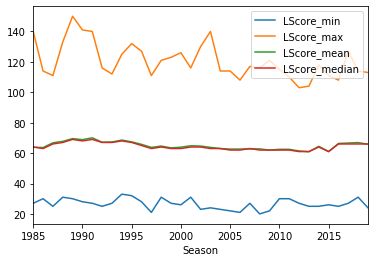

In [28]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

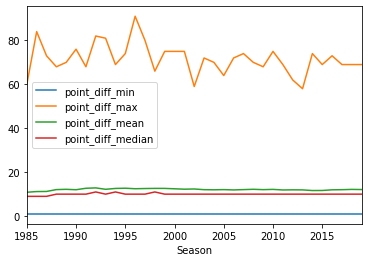

In [29]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

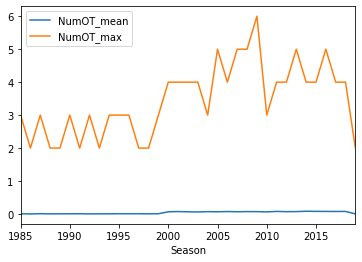

In [30]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [31]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1985   A             41         142    72.491023             72          1114   
       H             37         128    75.935383             75          2244   
       N             43         121    74.105541             74           379   
1986   A             35         126    72.163964             72          1110   
       H             42         151    76.169076             76          2283   
...                 ...         ...          ...            ...           ...   
2018   H             47         132    79.998109             80          3173   
       N             44         116    77.362460             77           618   
2019   A             47         116    76.432574             76          1713   
       H             42         139    78.884750             78          3141   
       N             50         118    76.835796             77           609   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1985   A             35         140    63.952424           63.0          1114   
       H             27         105    63.839127           64.0          2244   
       N             37          96    63.715040           64.0           379   
1986   A             30          97    63.426126           63.0          1110   
       H             31         114    63.786684           63.0          2283   
...                 ...         ...          ...            ...           ...   
2018   H             31         113    66.271352           66.0          3173   
       N             42         109    66.796117           66.5           618   
2019   A             24         106    66.846468           66.0          1713   
       H             33         113    65.209806           65.0          3141   
       N             38         107    65.816092           66.0           609   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1985   A             0          3    0.007181             0         1114   
       H             0          1    0.002228             0         2244   
       N             0          3    0.042216             0          379   
1986   A             0          2    0.001802             0         1110   
       H             0          1    0.001752             0         2283   
...                ...        ...         ...           ...          ...   
2018   H             0          3    0.070596             0         3173   
       N             0          4    0.063107             0          618   
2019   A             0          0    0.000000             0         1713   
       H             0          2    0.000955             0         3141   
       N             0          1    0.018062             0          609   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1985   A                  1              43         8.538600   
       H                  1              60        12.096257   
       N                  1              47        10.390501   
1986   A                  1              53         8.737838   
       H                  1              53        12.382392   
...                     ...             ...              ...   
2018   H                  1              69        13.726757   
       N                  1              47        10.566343   
2019   A                  1              59         9.586106   
       H                  1              69        13.674944   
       N                  1              39        11.019704   

             point_diff_median  point_diff_count  
Season WLoc                     

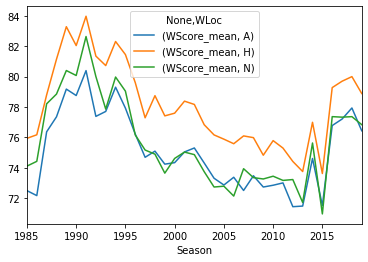

In [32]:
summaries[['WScore_mean']].unstack().plot()

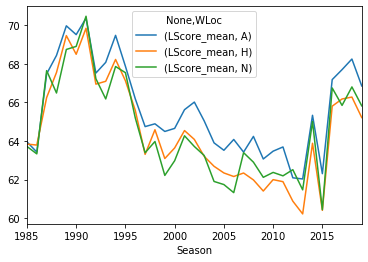

In [33]:
summaries[['LScore_mean']].unstack().plot()

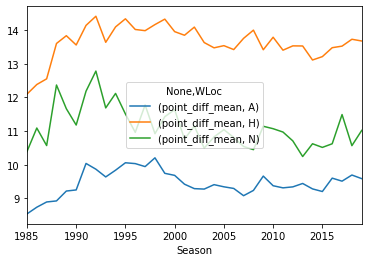

In [34]:
summaries[['point_diff_mean']].unstack().plot()

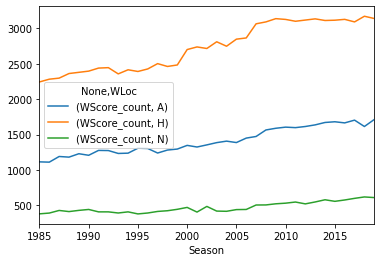

In [35]:
summaries[['WScore_count']].unstack().plot()

# Playoff compact results

In [36]:
[file for file in men_comp if 'NCAATourneyCompact' in file]

['data/raw_men/MDataFiles_Stage1/MNCAATourneyCompactResults.csv']

In [37]:
df = pd.read_csv('data/raw_men/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
print(df.shape)
df.head()

(2251, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985     136     1116      63     1234      54    N      0
1    1985     136     1120      59     1345      58    N      0
2    1985     136     1207      68     1250      43    N      0
3    1985     136     1229      58     1425      55    N      0
4    1985     136     1242      49     1325      38    N      0

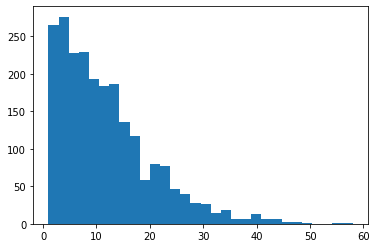

In [38]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)
plt.grid(False)

In [39]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1985            46          96    68.047619           67.0          38   
1986            58         101    76.841270           74.0          43   
1987            57         113    82.603175           83.0          51   
1988            54         123    83.349206           83.0          47   
1989            50         124    85.222222           85.0          46   
1990            49         149    80.761905           78.0          46   
1991            50         117    80.079365           79.0          48   
1992            51         106    81.238095           81.0          43   
1993            54         112    81.761905           81.0          50   
1994            51         112    78.349206           77.0          39   
1995            49         113    78.222222           76.0          47   
1996            43         110    77.666667           77.0          41   
1997            55         109    77.428571           76.0          40   
1998            51         110    78.492063           79.0          46   
1999            43         108    74.666667           75.0          32   
2000            48         105    73.222222           74.0          38   
2001            50         101    77.468750           77.5          35   
2002            63         105    79.625000           80.0          37   
2003            47         108    76.562500           77.0          46   
2004            53         102    75.500000           75.5          43   
2005            55         111    75.562500           75.0          46   
2006            50          98    73.203125           73.0          44   
2007            54         121    75.703125           76.0          42   
2008            51         113    77.218750           75.5          29   
2009            58         103    77.250000           77.0          43   
2010            51         101    74.031250           73.0          44   
2011            53         102    73.194030           72.0          41   
2012            57         102    71.402985           71.0          41   
2013            54          95    72.208955           73.0          34   
2014            55          93    73.850746           75.0          35   
2015            56          94    72.925373           72.0          39   
2016            47         105    78.343284           78.0          43   
2017            60         103    79.432836           78.0          39   
2018            50         102    76.253731           76.0          43   
2019            53          99    76.358209           77.0          44   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1985            84    59.333333           58.0          0          1   
1986            87    66.142857           65.0          0          1   
1987            97    71.984127           71.0          0          1   
1988           115    71.285714           72.0          0          1   
1989           101    73.253968           73.0          0          1   
1990           115    70.761905           70.0          0          1   
1991            90    67.809524           68.0          0          1   
1992           103    68.730159           69.0          0          1   
1993            84    66.841270           68.0          0          1   
1994           102    67.238095           68.0          0          1   
1995            96    66.269841           66.0          0          3   
1996            90    63.825397           63.0          0          1   
1997            92    65.952381           66.0          0          1   
1998            87    65.968254           65.0          0          1   
1999            88    61.126984           61.0          0          1   
2000            80    61.666667           61.

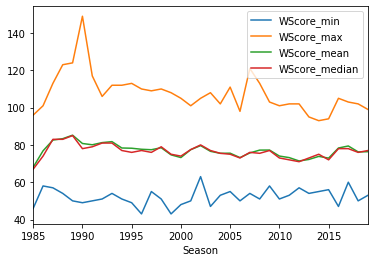

In [40]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

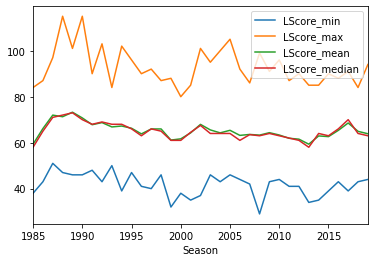

In [41]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

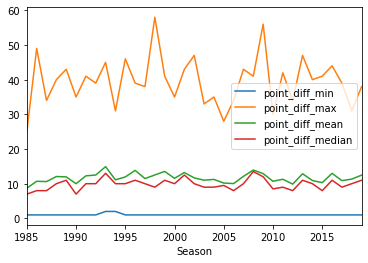

In [42]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

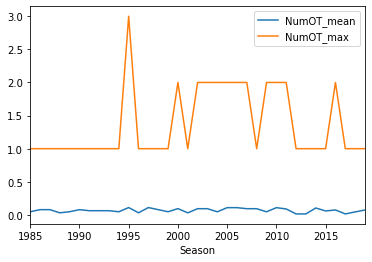

In [43]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [44]:
df.WLoc.value_counts()

N    2251
Name: WLoc, dtype: int64

# Detailed results

In [45]:
[col for col in men_comp if 'Detailed' in col]

['data/raw_men/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv',
 'data/raw_men/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv']

In [46]:
reg_season = pd.read_csv('data/raw_men/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
print(df.shape)
stats = [col for col in reg_season.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season = process_details(reg_season)

reg_season.head()

(2251, 9)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0      3     14    11    18   14   24    13   23     7     1   22    22    53   
1      8     20    10    19   15   28    16   13     4     4   18    24    67   
2      8     18    17    29   17   26    15   10     5     2   25    22    73   
3      3      9    17    31    6   19    11   12    14     2   18    18    49   
4      6     14    11    13   17   22    12   14     4     4   20    24    62   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WFG_perc  \
0      2     10    16    22   10   22     8   18     9     2   20  0.465517   
1      6     24     9    20   20   25     7   12     8     6   16  0.419355   
2      3     26    14    23   31   22     9   12     2     5   23  0.413793   
3      6     22     8    15   17   20     9   19     4     3   23  0.473684   
4      6     16    17    27   21   15    12   10     7     1   14  0.491803   

   WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  WFGM_no_ast  \
0     24     44   0.545455   0.214286  0.611111        38           14   
1     18     42   0.428571   0.400000  0.526316        43           10   
2     16     40   0.400000   0.444444  0.586207        43            9   
3     15     29   0.517241   0.333333  0.548387        25            7   
4     24     47   0.510638   0.428571  0.846154        39           18   

   WFGM_no_ast_perc  Wpossessions  Woff_rating  Wscoring_opp  WTO_perposs  \
0          0.518519        58.450   116.338751      1.138580     0.393499   
1          0.384615        50.975   137.322217      1.393330     0.255027   
2          0.375000        37.225   196.104768      1.928140     0.268637   
3          0.388889        29.275   191.289496      1.801025     0.409906   
4          0.600000        51.825   148.576942      1.296189     0.270140   

   LFG_perc  LFGM2  LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  \
0  0.415094     20     43   0.465116   0.200000  0.727273        32   
1  0.358209     18     43   0.418605   0.250000  0.450000        45   
2  0.301370     19     47   0.404255   0.115385  0.608696        53   
3  0.367347     12     27   0.444444   0.272727  0.533333        37   
4  0.387097     18     46   0.391304   0.375000  0.629630        36   

   LFGM_no_ast  LFGM_no_ast_perc  Lpossessions  Loff_rating  Lscoring_opp  \
0           14          0.636364        50.550   122.650841      1.255193   
1           17          0.708333        49.500   127.272727      1.545455   
2           13          0.590909        43.075   141.613465      1.948346   
3            9          0.500000        43.875   113.960114      1.279202   
4           12          0.500000        38.175   185.985593      1.960052   

   LTO_perposs  Wdef_rating  Ldef_rating   Wimpact   Limpact  WDef_effort  \
0     0.356083   122.650841   116.338751  0.543379  0.456621    80.264151   
1     0.242424   127.272727   137.322217  0.583710  0.416290    95.000000   
2     0.278584   141.613465   196.104768  0.664740  0.335260    92.150685   
3     0.433048   113.960114   191.289496  0.619048  0.380952    65.102041   
4     0.261952   185.985593   148.576942  0.573123  0.426877    82.548387   

   LDef_effort  WReb_opp  LReb_opp  Score_diff  FGM_diff  FGA_diff  FGM3_diff  \
0    70.965517  0.774194  0.709677           6         5         5          1   
1    83.290323  0.651163  0.694444           7         2        -5          2   
2    88.724138  0.509804  0.647059          12         2      

In [47]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season.columns if col not in not_sum]

summaries = reg_season[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries.sample(5)

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
2012   N             42         105    73.221154             73           520   
2007   H             40         129    76.094586             75          3066   
2009   H             43         122    74.822874             74          3139   
2019   H             42         139    78.884750             78          3141   
2011   A             41         114    73.001877             73          1598   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
2012   N             35         100    62.513462           62.0           520   
2007   H             27         117    62.340509           62.0          3066   
2009   H             22         102    61.407773           61.0          3139   
2019   H             33         113    65.209806           65.0          3141   
2011   A             30         108    63.688986           63.0          1598   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
2012   N             0          3    0.094231             0          520   
2007   H             0          3    0.059687             0         3066   
2009   H             0          4    0.059255             0         3139   
2019   H             0          2    0.000955             0         3141   
2011   A             0          4    0.113267             0         1598   

             WFGM_min  WFGM_max  WFGM_mean  WFGM_median  WFGM_count  WFGA_min  \
Season WLoc                                                                     
2012   N           12        39  25.086538           25         520        34   
2007   H           11        48  26.295825           26        3066        32   
2009   H           12        47  25.940427           26        3139        30   
2019   H           11        53  27.453677           27        3141        37   
2011   A           12        42  25.300375           25        1598        32   

             WFGA_max  WFGA_mean  WFGA_median  WFGA_count  WFGM3_min  \
Season WLoc                                                            
2012   N           77  54.073077           54         520          0   
2007   H           88  54.770711           55        3066          0   
2009   H           83  54.828608           54        3139          0   
2019   H           87  57.340337           57        3141          0   
2011   A           84  53.991239           53        1598          0   

             WFGM3_max  WFGM3_mean  WFGM3_median  WFGM3_count  WFGA3_min  \
Season WLoc                                                                
2012   N            17    6.873077             7          520          4   
2007   H            21    7.108937             7         3066          3   
2009   H            19    6.782096             7         3139          1   
2019   H            23    8.398599             8         3141          4   
2011   A            18    6.734043             7         1598          3   

             WFGA3_max  WFGA3_mean  WFGA3_median  WFGA3_count  WFTM_min  \
Season WLoc                                                               
2012   N            40   17.721154            17          520         3   
2007   H            56   18.355186            18         3066         0   
2009   H            50   18.007009            18         3139         1   
2019   H            48   22.267112            22         3141         1   
2011   A            39   17.404255            17         1598         1   

             WFTM_max  WFTM_mean  WFTM_median  WFTM_count  WFTA_min  WFTA_max  \
Season WLoc                                                                     
2012   N           36  16.175000           16     

In [48]:
[c for c in summaries.columns if ('_perc_mean' in c or '_frac_mean' in c) and c.startswith('W')]

['WFG_perc_mean',
 'WFG2_perc_mean',
 'WFG3_perc_mean',
 'WFT_perc_mean',
 'WFGM_no_ast_perc_mean']

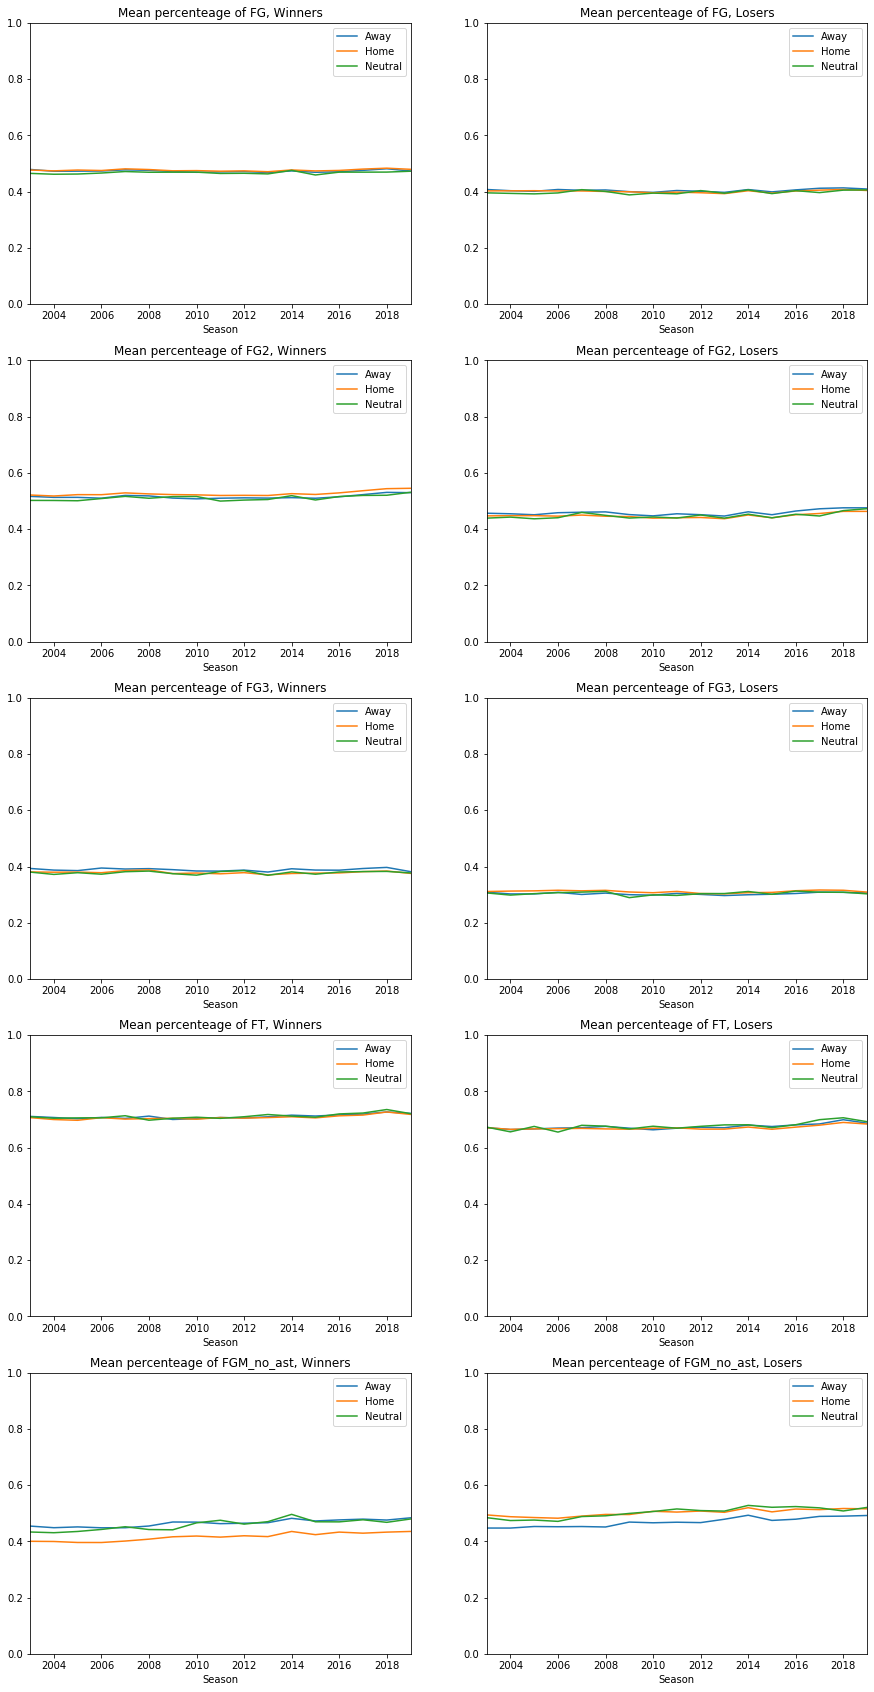

In [49]:
fig, ax= plt.subplots(5,2, figsize=(15, 6*5))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

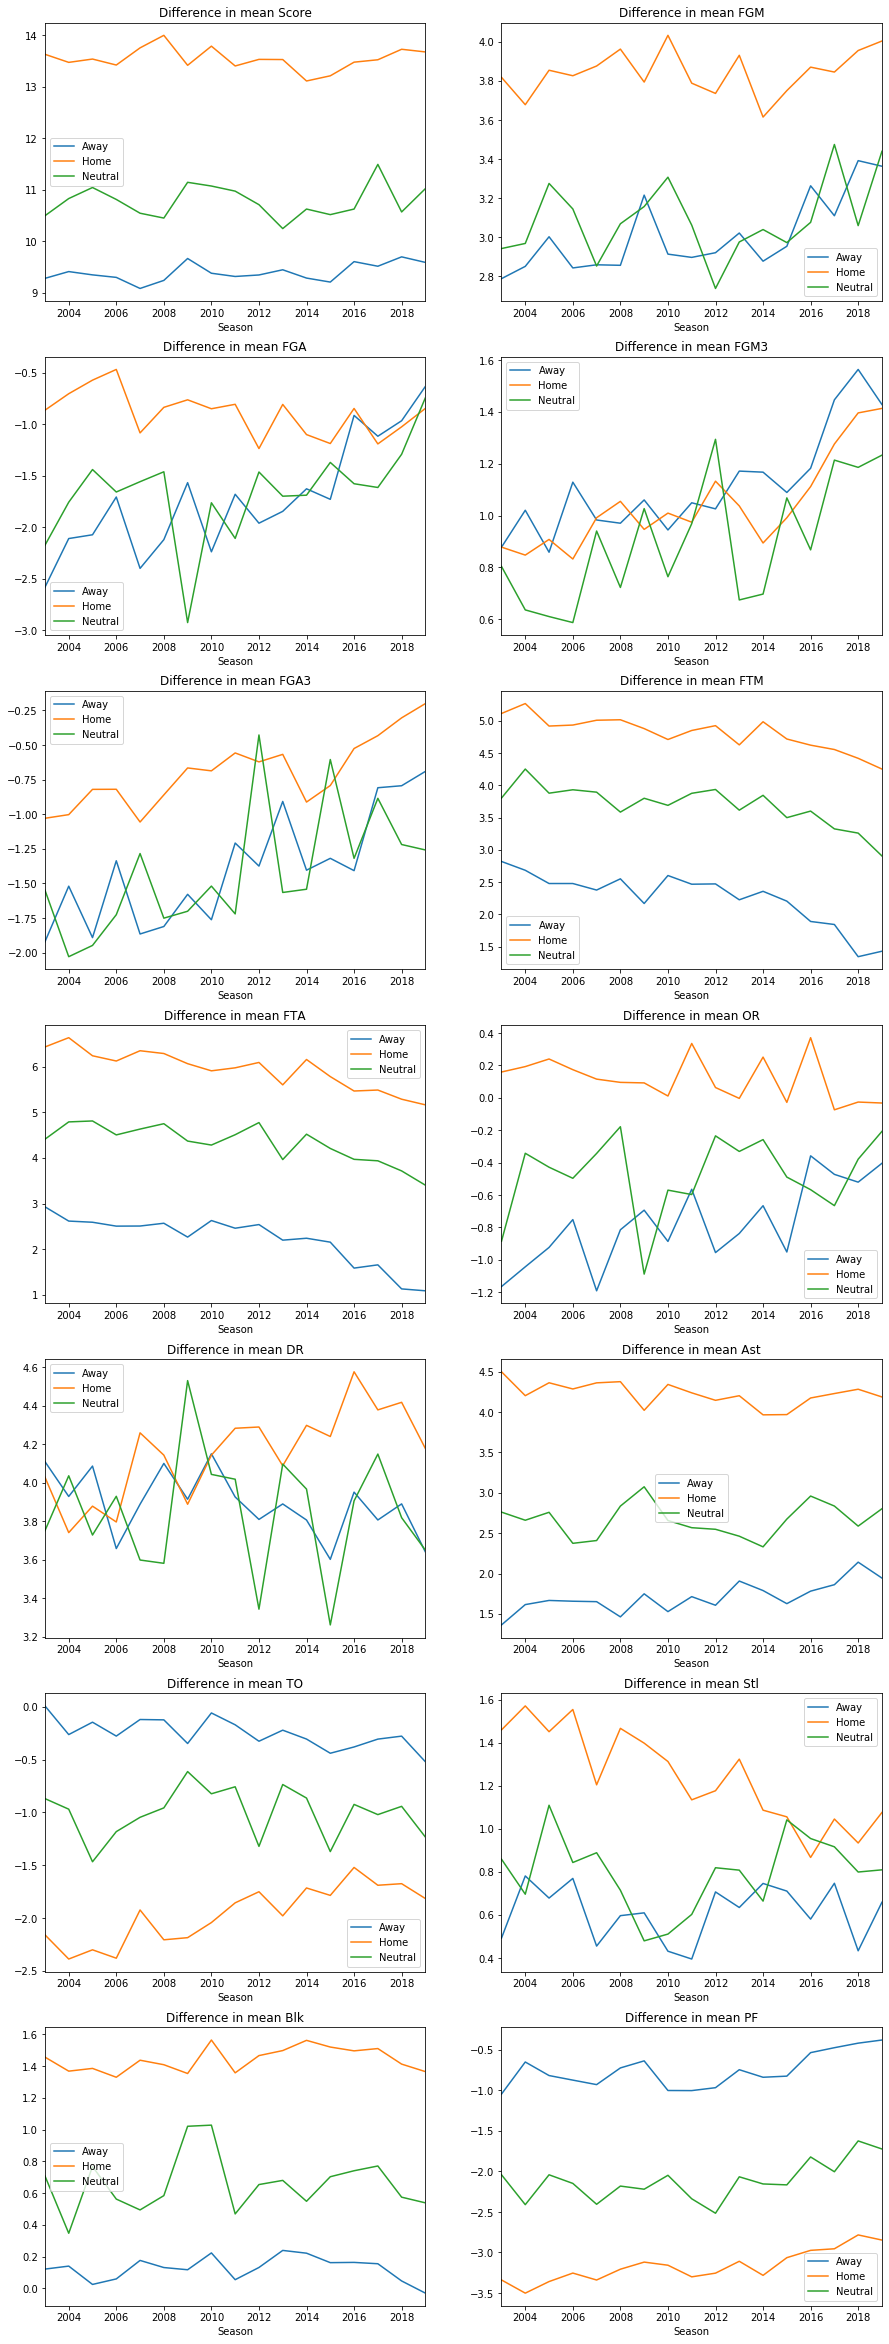

In [50]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

In [51]:
playoff = pd.read_csv('data/raw_men/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')

playoff= process_details(playoff)

playoff.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003     134     1421      92     1411      84    N      1    32    69   
1    2003     136     1112      80     1436      51    N      0    31    66   
2    2003     136     1113      84     1272      71    N      0    31    59   
3    2003     136     1141      79     1166      73    N      0    29    53   
4    2003     136     1143      76     1301      74    N      1    27    64   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0     11     29    17    26   14   30    17   12     5     3   22    29    67   
1      7     23    11    14   11   36    22   16    10     7    8    20    64   
2      6     14    16    22   10   27    18    9     7     4   19    25    69   
3      3      7    18    25   11   20    15   18    13     1   19    27    60   
4      7     20    15    23   18   20    17   13     8     2   14    25    56   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WFG_perc  \
0     12     31    14    31   17   28    16   15     5     0   22  0.463768   
1      4     16     7     7    8   26    12   17    10     3   15  0.469697   
2      7     28    14    21   20   22    11   12     2     5   18  0.525424   
3      7     17    12    17   14   17    20   21     6     6   21  0.547170   
4      9     21    15    20   10   26    16   14     5     8   19  0.421875   

   WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  WFGM_no_ast  \
0     21     40   0.525000   0.379310  0.653846        44           15   
1     24     43   0.558140   0.304348  0.785714        47            9   
2     25     45   0.555556   0.428571  0.727273        37           13   
3     26     46   0.565217   0.428571  0.720000        31           14   
4     20     44   0.454545   0.350000  0.652174        38           10   

   WFGM_no_ast_perc  Wpossessions  Woff_rating  Wscoring_opp  WTO_perposs  \
0          0.468750        54.650   168.344007      1.488564     0.219579   
1          0.290323        64.350   124.320124      1.128982     0.248640   
2          0.419355        47.550   176.656151      1.460568     0.189274   
3          0.482759        48.125   164.155844      1.348052     0.374026   
4          0.370370        48.075   158.086323      1.558502     0.270411   

   LFG_perc  LFGM2  LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  \
0  0.432836     17     36   0.472222   0.387097  0.451613        45   
1  0.312500     16     48   0.333333   0.250000  1.000000        34   
2  0.362319     18     41   0.439024   0.250000  0.666667        42   
3  0.450000     20     43   0.465116   0.411765  0.705882        31   
4  0.446429     16     35   0.457143   0.428571  0.750000        36   

   LFGM_no_ast  LFGM_no_ast_perc  Lpossessions  Loff_rating  Lscoring_opp  \
0           13          0.448276        50.275   167.081054      1.625559   
1            8          0.400000        69.675    73.196986      0.966272   
2           14          0.560000        51.025   139.147477      1.547771   
3            7          0.259259        58.925   123.886296      1.155282   
4            9          0.360000        50.500   146.534653      1.297030   

   LTO_perposs  Wdef_rating  Ldef_rating   Wimpact   Limpact  WDef_effort  \
0     0.298359   167.081054   168.344007  0.567114  0.432886   115.477612   
1     0.243990    73.196986   124.320124  0.709265  0.290735    90.750000   
2     0.235179   139.147477   176.656151  0.645161  0.354839    97.405797   
3     0.356385   123.886296   164.155844  0.553333  0.446667    70.850000   
4     0.277228   146.534653   158.086323  0.489796  0.510204    82.750000   

   LDef_effort  WReb_opp  LReb_opp  Score_diff  FGM_diff  FGA_diff  FGM3_diff  \
0   104.043478  0.789474  0.756757           8         3         2         -1   
1    82.045455  0.818182  0.742857          29        11         2          3   
2    74.847458  0.613636  0.785714          13         6      

In [52]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff.columns if col not in not_sum]

summaries = playoff[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season                                                                     
2003            47         108    76.562500           77.0            64   
2004            53         102    75.500000           75.5            64   
2005            55         111    75.562500           75.0            64   
2006            50          98    73.203125           73.0            64   
2007            54         121    75.703125           76.0            64   
2008            51         113    77.218750           75.5            64   
2009            58         103    77.250000           77.0            64   
2010            51         101    74.031250           73.0            64   
2011            53         102    73.194030           72.0            67   
2012            57         102    71.402985           71.0            67   
2013            54          95    72.208955           73.0            67   
2014            55          93    73.850746           75.0            67   
2015            56          94    72.925373           72.0            67   
2016            47         105    78.343284           78.0            67   
2017            60         103    79.432836           78.0            67   
2018            50         102    76.253731           76.0            67   
2019            53          99    76.358209           77.0            67   

        LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season                                                                     
2003            46          95    65.546875           64.0            64   
2004            43         100    64.265625           64.0            64   
2005            46         105    65.375000           64.0            64   
2006            44          92    63.171875           61.0            64   
2007            42          86    63.578125           63.5            64   
2008            29          99    63.281250           63.0            64   
2009            43          91    64.343750           64.0            64   
2010            44          96    63.328125           63.0            64   
2011            41          87    61.910448           62.0            67   
2012            41          90    61.522388           61.0            67   
2013            34          85    59.343284           58.0            67   
2014            35          85    62.925373           64.0            67   
2015            39          90    62.626866           63.0            67   
2016            43          88    65.358209           66.0            67   
2017            39          91    68.552239           70.0            67   
2018            43          84    64.925373           64.0            67   
2019            44          94    63.880597           63.0            67   

        NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  WFGM_min  \
Season                                                                          
2003            0          2    0.093750             0           64        17   
2004            0          2    0.046875             0           64        13   
2005            0          2    0.109375             0           64        15   
2006            0          2    0.109375             0           64        14   
2007            0          2    0.093750             0           64        15   
2008            0          1    0.093750             0           64        19   
2009            0          2    0.046875             0           64        17   
2010            0          2    0.109375             0           64        15   
2011            0          2    0.089552             0           67        18   
2012            0          1    0.014925             0           67        17   
2013            0          1    0.014925             0           67        16   
2014            0          1    0.104478             0           

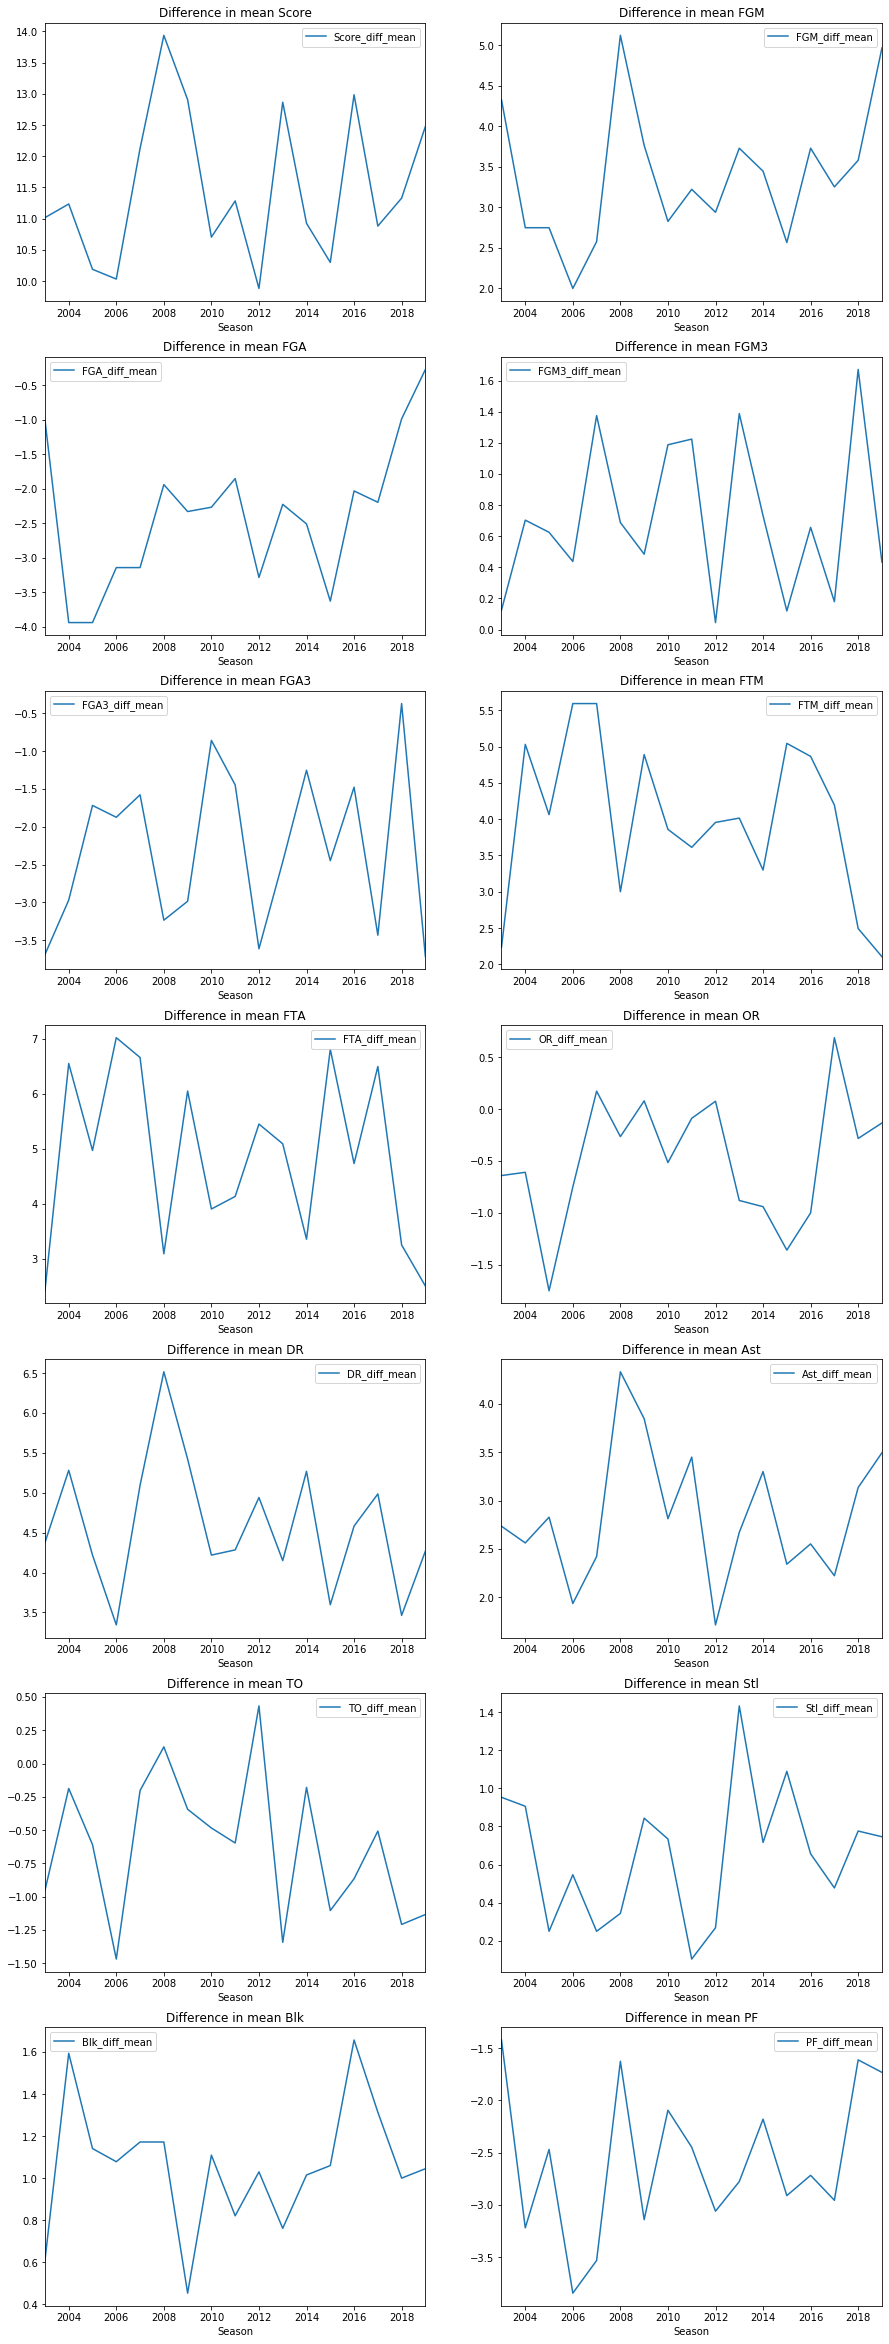

In [53]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

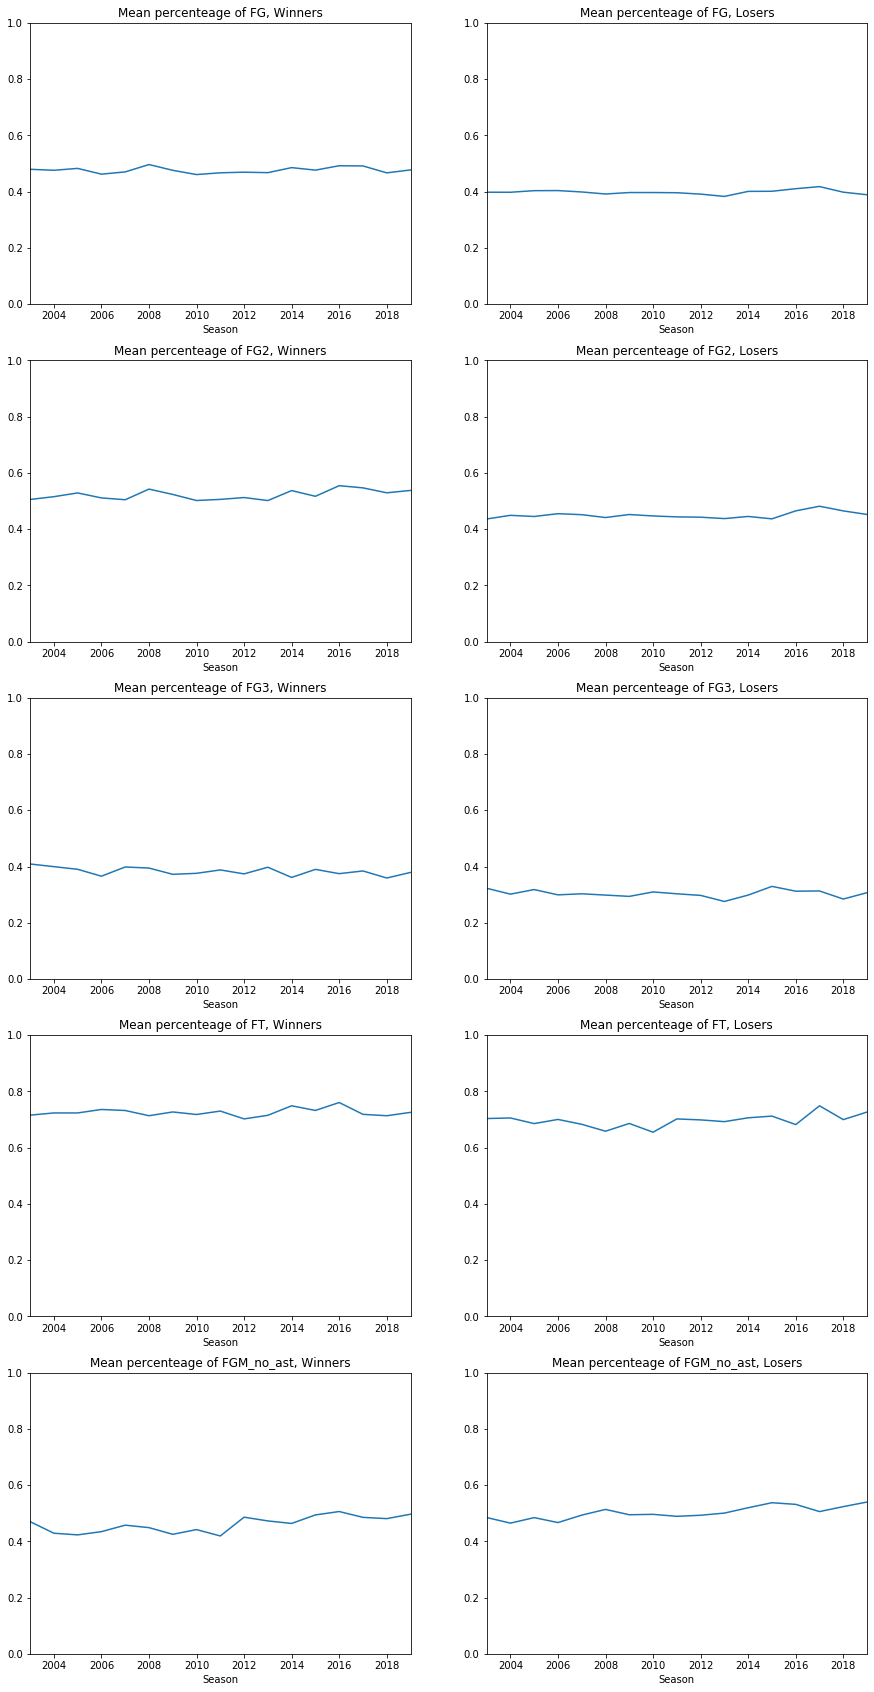

In [54]:
fig, ax= plt.subplots(5,2, figsize=(15, 6*5))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

# Seeds

In [55]:
[col for col in men_comp if 'Seed' in col]

['data/raw_men/MDataFiles_Stage1/MNCAATourneySeeds.csv',
 'data/raw_men/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv']

In [56]:
seeds = pd.read_csv('data/raw_men/MDataFiles_Stage1/MNCAATourneySeeds.csv')
seeds.head()

Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374

In [57]:
slots = pd.read_csv('data/raw_men/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv')
slots.head()

Seed  GameRound GameSlot  EarlyDayNum  LateDayNum
0  W01          1     R1W1          136         137
1  W01          2     R2W1          138         139
2  W01          3     R3W1          143         144
3  W01          4     R4W1          145         146
4  W01          5     R5WX          152         152

# Rankings

In [58]:
[col for col in men_comp if 'Mass' in col]

['data/raw_men/MDataFiles_Stage1/MMasseyOrdinals.csv']

In [59]:
massey = pd.read_csv('data/raw_men/MDataFiles_Stage1/MMasseyOrdinals.csv')
massey.head()

Season  RankingDayNum SystemName  TeamID  OrdinalRank
0    2003             35        SEL    1102          159
1    2003             35        SEL    1103          229
2    2003             35        SEL    1104           12
3    2003             35        SEL    1105          314
4    2003             35        SEL    1106          260

In [60]:
print(massey.SystemName.nunique())

174


In [61]:
tmp = massey[['Season', 'RankingDayNum', 'TeamID',
              'OrdinalRank']].groupby(['Season', 'TeamID',
                                       'RankingDayNum']).agg(['mean', 'max', 'min'])
tmp.columns = ['_'.join(col).strip() for col in tmp.columns.values]
tmp = tmp.reset_index()
tmp.head()

Season  TeamID  RankingDayNum  OrdinalRank_mean  OrdinalRank_max  \
0    2003    1102             35        159.000000              159   
1    2003    1102             37        118.000000              219   
2    2003    1102             42        191.000000              191   
3    2003    1102             43        108.000000              108   
4    2003    1102             44         88.866667              153   

   OrdinalRank_min  
0              159  
1               90  
2              191  
3              108  
4               52

In [62]:
tmp[tmp.OrdinalRank_mean != tmp.OrdinalRank_min]

Season  TeamID  RankingDayNum  OrdinalRank_mean  OrdinalRank_max  \
1         2003    1102             37        118.000000              219   
4         2003    1102             44         88.866667              153   
6         2003    1102             51        133.052632              199   
7         2003    1102             56        177.500000              184   
8         2003    1102             57        148.470588              197   
...        ...     ...            ...               ...              ...   
224623    2019    1466            107        311.828125              345   
224624    2019    1466            114        310.435484              342   
224625    2019    1466            121        302.111111              342   
224626    2019    1466            128        304.285714              343   
224627    2019    1466            133        303.111111              343   

        OrdinalRank_min  
1                    90  
4                    52  
6                    52  
7                   173  
8                   116  
...                 ...  
224623              270  
224624              275  
224625              272  
224626              271  
224627              260  

[194137 rows x 6 columns]

In [63]:
massey.RankingDayNum.max()

133

In [64]:
massey.TeamID.value_counts().head()

1181    12019
1242    11978
1314    11865
1277    11816
1246    11814
Name: TeamID, dtype: int64

# play by play

In [65]:
[col for col in men_comp if 'Events' in col]

['data/raw_men/MEvents2019.csv',
 'data/raw_men/MEvents2018.csv',
 'data/raw_men/MEvents2017.csv',
 'data/raw_men/MEvents2015.csv',
 'data/raw_men/MEvents2016.csv']

In [66]:
pbp_event = pd.read_csv('data/raw_men/MEvents2019.csv')
pbp_event.head()

EventID  Season  DayNum  WTeamID  LTeamID  WFinalScore  LFinalScore  \
0  10442717    2019       1     1104     1380           82           62   
1  10442718    2019       1     1104     1380           82           62   
2  10442719    2019       1     1104     1380           82           62   
3  10442720    2019       1     1104     1380           82           62   
4  10442721    2019       1     1104     1380           82           62   

   WCurrentScore  LCurrentScore  ElapsedSeconds  EventTeamID  EventPlayerID  \
0              0              0              18         1380          10314   
1              0              0              18         1380          10307   
2              0              0              42         1104            129   
3              0              0              58         1380          10303   
4              0              0              63         1104            143   

  EventType EventSubType  X  Y  Area  
0     made2         jump  0  0     0  
1    assist          NaN  0  0     0  
2     made2         jump  0  0     0  
3  turnover          unk  0  0     0  
4     made3          unk  0  0     0

In [67]:
#pbp_play = pd.read_csv('data/raw_men/MPlayers.csv')
#pbp_play.head()

# Putting things together

In [68]:
reg_season.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0      3     14    11    18   14   24    13   23     7     1   22    22    53   
1      8     20    10    19   15   28    16   13     4     4   18    24    67   
2      8     18    17    29   17   26    15   10     5     2   25    22    73   
3      3      9    17    31    6   19    11   12    14     2   18    18    49   
4      6     14    11    13   17   22    12   14     4     4   20    24    62   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WFG_perc  \
0      2     10    16    22   10   22     8   18     9     2   20  0.465517   
1      6     24     9    20   20   25     7   12     8     6   16  0.419355   
2      3     26    14    23   31   22     9   12     2     5   23  0.413793   
3      6     22     8    15   17   20     9   19     4     3   23  0.473684   
4      6     16    17    27   21   15    12   10     7     1   14  0.491803   

   WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  WFGM_no_ast  \
0     24     44   0.545455   0.214286  0.611111        38           14   
1     18     42   0.428571   0.400000  0.526316        43           10   
2     16     40   0.400000   0.444444  0.586207        43            9   
3     15     29   0.517241   0.333333  0.548387        25            7   
4     24     47   0.510638   0.428571  0.846154        39           18   

   WFGM_no_ast_perc  Wpossessions  Woff_rating  Wscoring_opp  WTO_perposs  \
0          0.518519        58.450   116.338751      1.138580     0.393499   
1          0.384615        50.975   137.322217      1.393330     0.255027   
2          0.375000        37.225   196.104768      1.928140     0.268637   
3          0.388889        29.275   191.289496      1.801025     0.409906   
4          0.600000        51.825   148.576942      1.296189     0.270140   

   LFG_perc  LFGM2  LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  \
0  0.415094     20     43   0.465116   0.200000  0.727273        32   
1  0.358209     18     43   0.418605   0.250000  0.450000        45   
2  0.301370     19     47   0.404255   0.115385  0.608696        53   
3  0.367347     12     27   0.444444   0.272727  0.533333        37   
4  0.387097     18     46   0.391304   0.375000  0.629630        36   

   LFGM_no_ast  LFGM_no_ast_perc  Lpossessions  Loff_rating  Lscoring_opp  \
0           14          0.636364        50.550   122.650841      1.255193   
1           17          0.708333        49.500   127.272727      1.545455   
2           13          0.590909        43.075   141.613465      1.948346   
3            9          0.500000        43.875   113.960114      1.279202   
4           12          0.500000        38.175   185.985593      1.960052   

   LTO_perposs  Wdef_rating  Ldef_rating   Wimpact   Limpact  WDef_effort  \
0     0.356083   122.650841   116.338751  0.543379  0.456621    80.264151   
1     0.242424   127.272727   137.322217  0.583710  0.416290    95.000000   
2     0.278584   141.613465   196.104768  0.664740  0.335260    92.150685   
3     0.433048   113.960114   191.289496  0.619048  0.380952    65.102041   
4     0.261952   185.985593   148.576942  0.573123  0.426877    82.548387   

   LDef_effort  WReb_opp  LReb_opp  Score_diff  FGM_diff  FGA_diff  FGM3_diff  \
0    70.965517  0.774194  0.709677           6         5         5          1   
1    83.290323  0.651163  0.694444           7         2        -5          2   
2    88.724138  0.509804  0.647059          12         2      

In [69]:
reg_s = full_stats(reg_season)
reg_s.head()

Season  TeamID      Score        FGM        FGA      FGM3       FGA3  \
0    2003    1102  57.250000  19.142857  39.785714  7.821429  20.821429   
1    2003    1103  78.777778  27.148148  55.851852  5.444444  16.074074   
2    2003    1104  69.285714  24.035714  57.178571  6.357143  19.857143   
3    2003    1105  71.769231  24.384615  61.615385  7.576923  20.769231   
4    2003    1106  63.607143  23.428571  55.285714  6.107143  17.642857   

         FTM        FTA         OR         DR        Ast         TO       Stl  \
0  11.142857  17.107143   4.178571  16.821429  13.000000  11.428571  5.964286   
1  19.037037  25.851852   9.777778  19.925926  15.222222  12.629630  7.259259   
2  14.857143  20.928571  13.571429  23.928571  12.107143  13.285714  6.607143   
3  15.423077  21.846154  13.500000  23.115385  14.538462  18.653846  9.307692   
4  10.642857  16.464286  12.285714  23.857143  11.678571  17.035714  8.357143   

        Blk         PF       FGM2       FGA2    Tot_Reb  FGM_no_ast  \
0  1.785714  18.750000  11.321429  18.964286  21.000000    6.142857   
1  2.333333  19.851852  21.703704  39.777778  29.703704   11.925926   
2  3.785714  18.035714  17.678571  37.321429  37.500000   11.928571   
3  2.076923  20.230769  16.807692  40.846154  36.615385    9.846154   
4  3.142857  18.178571  17.321429  37.642857  36.142857   11.750000   

   possessions  off_rating  scoring_opp  TO_perposs  def_rating    impact  \
0    38.909821  152.377590     1.262502    0.296017  164.998993  0.487043   
1    46.424074  176.360454     1.515959    0.275118  159.367215  0.498574   
2    46.951786  150.535981     1.461792    0.288453  133.581595  0.527160   
3    56.392308  130.253713     1.300678    0.332852  148.153764  0.444964   
4    52.215179  124.436973     1.229605    0.333292  140.394764  0.506812   

   Def_effort   Reb_opp  Score_diff  FGM_diff  FGA_diff  FGM3_diff  FGA3_diff  \
0   62.396341  0.729546    0.250000 -0.142857 -2.642857   3.071429   8.392857   
1   77.598871  0.684811    0.629630 -0.629630 -1.148148  -1.222222  -2.296296   
2   79.614216  0.745133    4.285714  0.785714  1.678571   0.000000   0.714286   
3   84.923297  0.728313   -4.884615 -2.615385  2.653846   1.307692   3.230769   
4   82.715089  0.758479   -0.142857  1.714286  1.892857   1.321429   2.428571   

   FTM_diff  FTA_diff   OR_diff   DR_diff  Ast_diff   TO_diff  Stl_diff  \
0 -2.535714 -2.142857 -5.428571 -3.321429  3.857143 -1.535714  0.535714   
1  3.111111  3.703704 -2.259259 -2.111111 -0.259259 -2.703704  0.851852   
2  2.714286  3.785714  2.678571  1.285714  0.428571 -0.571429  1.071429   
3 -0.961538 -2.653846  0.307692 -3.269231 -1.269231 -0.153846 -0.076923   
4 -4.892857 -5.500000  0.964286  1.500000 -0.107143  1.964286 -0.428571   

   Blk_diff   PF_diff  FGM2_diff  FGA2_diff  Tot_Reb_diff  FGM_no_ast_diff  \
0  0.214286  0.392857  -3.214286 -11.035714     -8.750000        -4.000000   
1 -0.518519 -2.592593   0.592593   1.148148     -4.370370        -0.370370   
2  0.607143 -1.214286   0.785714   0.964286      3.964286         0.357143   
3 -2.115385  1.153846  -3.923077  -0.576923     -2.961538        -1.346154   
4 -0.035714  2.035714   0.392857  -0.535714      2.464286         1.821429   

   Def_effort_diff  Reb_opp_diff  possessions_diff  off_rating_diff  \
0       -12.849104     -0.269979          2.267857       -12.621403   
1        -7.758290     -0.091868         -3.351852        16.993239   
2        -2.671172      0.052238         -3.369643        16.954386   
3        -6.917200      0.015613          3.452885       -17.900051   
4         8.425208      0.049761          5.505357       -15.957792   

   def_rating_diff  scoring_opp_diff  TO_perposs_diff  impact_diff    N_wins  \
0        12.621403         -0.217193        -0.064487    -0.025913  0.428571   
1       -16.993239          0.140261        -0.035031    -0.002852  0.481481   
2       -16.954386          0.168400         0.012090     0.054319  0.607143   
3        17.900051   

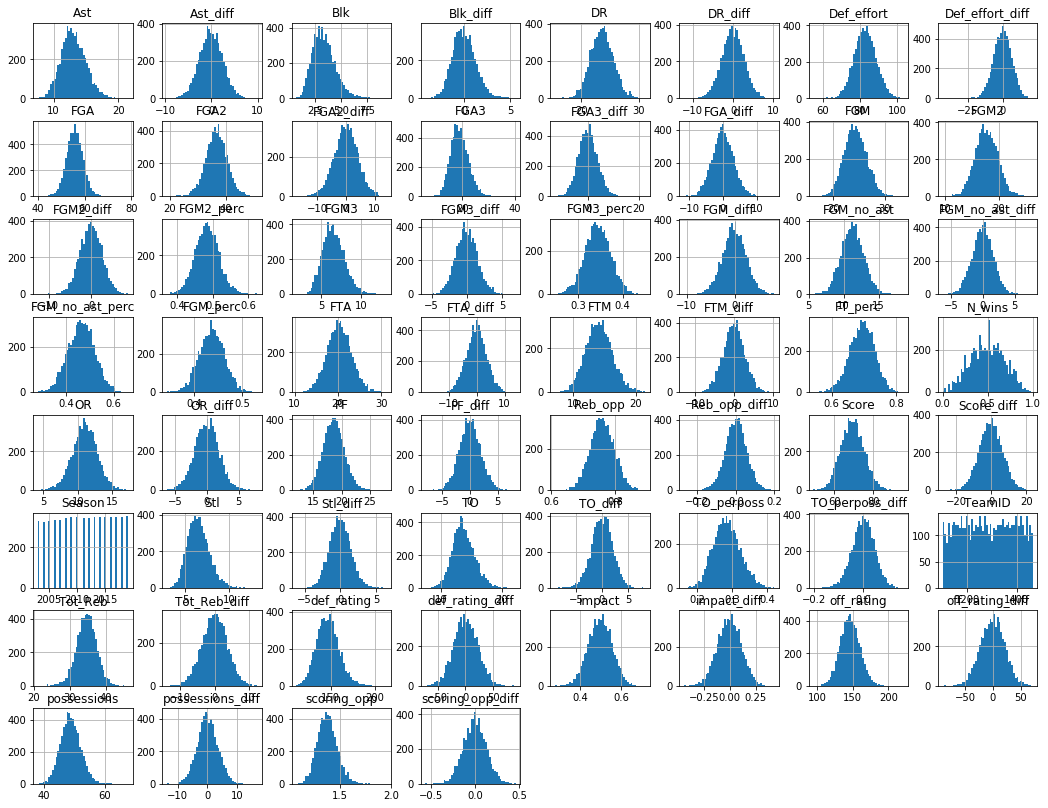

In [70]:
reg_s.hist(bins=50, figsize=(18, 14))
plt.show()

In [71]:
summary_reg = reg_s.groupby('Season')[[col for col in reg_s if col not in ['TeamID', 'Season']]].agg(['mean', 'max', 'min'])
summary_reg.columns = ['_'.join(col).strip() for col in summary_reg.columns.values]
summary_reg

Score_mean  Score_max  Score_min   FGM_mean    FGM_max    FGM_min  \
Season                                                                      
2003     69.680464  85.214286  49.629630  24.550438  30.321429  16.925926   
2004     68.918157  87.517241  49.240000  24.225984  31.517241  16.120000   
2005     68.574709  88.774194  54.320000  24.169609  31.516129  18.185185   
2006     68.551457  82.821429  52.066667  24.157309  30.785714  17.384615   
2007     68.691924  95.551724  50.357143  24.122084  33.206897  17.285714   
2008     68.736095  88.705882  54.777778  24.117603  31.852941  18.535714   
2009     67.898093  90.178571  49.838710  23.912948  31.354839  17.677419   
2010     68.414259  86.080000  51.866667  23.931704  30.062500  18.766667   
2011     68.307522  85.090909  55.888889  23.833782  30.363636  19.333333   
2012     67.294929  83.250000  51.468750  23.685419  30.937500  18.125000   
2013     66.776367  80.696970  49.678571  23.518918  28.333333  18.310345   
2014     70.183244  85.448276  56.586207  24.162335  30.310345  18.967742   
2015     66.766328  83.814815  51.111111  23.282522  29.296296  17.481481   
2016     72.231713  86.312500  55.870968  25.186856  31.187500  18.935484   
2017     72.555098  90.363636  58.535714  25.415563  33.727273  20.413793   
2018     72.899834  87.058824  60.419355  25.701863  31.029412  20.531250   
2019     71.774525  88.848485  56.266667  25.334383  32.181818  20.259259   

         FGA_mean    FGA_max    FGA_min  FGM3_mean   FGM3_max  FGM3_min  \
Season                                                                    
2003    56.093181  67.925926  39.785714   6.254943  10.074074  2.518519   
2004    55.672247  67.035714  42.035714   6.267614  11.607143  3.629630   
2005    55.479298  65.888889  39.814815   6.324953  11.068966  2.689655   
2006    55.348500  65.607143  41.538462   6.396786  11.423077  3.444444   
2007    54.946908  78.620690  42.178571   6.542866  12.413793  3.178571   
2008    55.163860  70.000000  41.000000   6.660450  11.280000  3.466667   
2009    55.131539  69.928571  43.193548   6.248745  13.250000  3.241379   
2010    55.392910  71.560000  43.785714   6.160522  11.160000  3.566667   
2011    55.037204  64.484848  44.133333   6.226712  10.962963  3.285714   
2012    54.697414  66.200000  46.419355   6.185283   9.939394  2.758621   
2013    54.721016  64.750000  44.642857   6.116362   9.848485  1.838710   
2014    55.126603  68.703704  46.200000   6.249501  10.363636  3.031250   
2015    53.997779  67.392857  44.818182   6.341495  10.928571  3.290323   
2016    57.662034  69.241379  46.741935   7.067912  12.100000  4.030303   
2017    57.717092  69.962963  48.468750   7.345907  12.777778  3.741935   
2018    57.954432  72.733333  50.612903   7.617623  12.166667  4.120000   
2019    57.603398  67.034483  49.531250   7.668712  11.740741  4.300000   

        FGA3_mean   FGA3_max   FGA3_min   FTM_mean    FTM_max   FTM_min  \
Season                                                                    
2003    18.051239  28.555556   9.740741  14.324645  20.034483  8.600000   
2004    18.209258  32.464286  10.875000  14.198576  21.266667  9.307692   
2005    18.282449  30.517241   9.931034  13.910539  20.483871  8.535714   
2006    18.365292  33.076923  11.642857  13.840053  19.961538  8.481481   
2007    18.799819  39.965517  10.428571  13.904890  19.193548  8.241379   
2008    19.012500  35.320000  11.827586  13.840440  19.875000  7.000000   
2009    18.257380  38.035714   9.965517  13.823451  20.612903  8.428571   
2010    18.050952  34.040000  10.344828  14.390328  20.250000  8.483871   
2011    18.111036  29.925926   9.321429  14.413246  20.129032  8.000000   
2012    18.032601  26.518519   9.068966  13.738808  20.878788  8.500000   
2013    18.046157  27.321429   6.064516  13.622169  18.968750  7.500000   
2014    18.160208  27.074074  10.500000  15.609074  21.484848  9.965517   
2015    18.491917  34.821429   9.967742  13.859789  19.250000  9.500

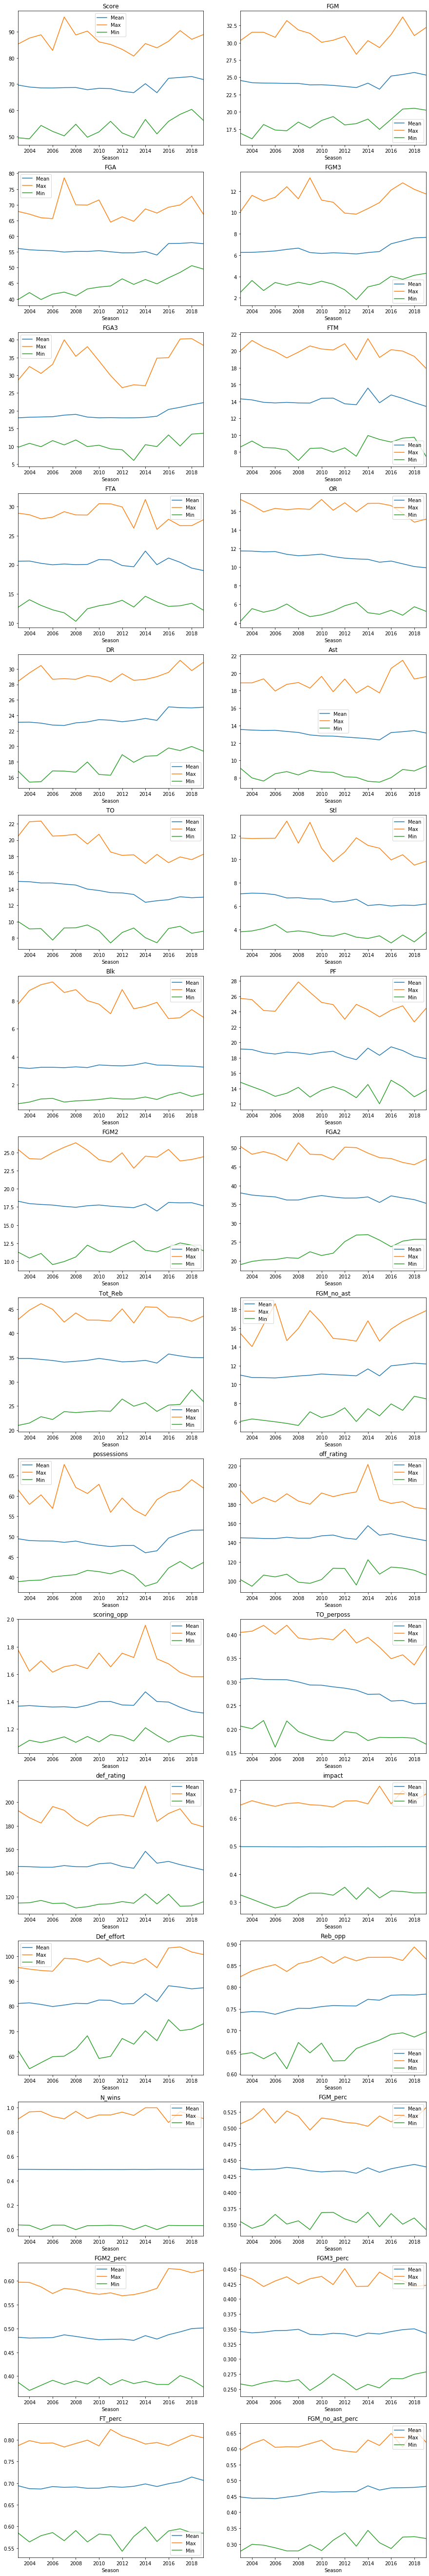

In [72]:
stats = [col.split('_mean')[0] for col in summary_reg if '_mean' in col and 'diff_' not in col]

fig, ax= plt.subplots(int(len(stats)/2),2, figsize=(15, 6*int(len(stats)/2)))

i, j = 0, 0

for col in stats:
    summary_reg[[col+'_mean', col+'_max', col+'_min']].plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Mean', 'Max', 'Min'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

plt.show()

# Exploring training data (from Notebook 3)

In [8]:
df = pd.read_csv('data/processed_men/training_data.csv')

df = df[[col for col in df if 'L2W' not in col]].copy()

df.head()

Season  DayNum  Team1  Team2  target  target_points  T1_Loc  T2_Loc  \
0    2003     134   1411   1421       0             -8       0       0   
1    2003     136   1112   1436       1             29       0       0   
2    2003     136   1113   1272       1             13       0       0   
3    2003     136   1141   1166       1              6       0       0   
4    2003     136   1143   1301       1              2       0       0   

               ID   T1_Score     T1_FGM     T1_FGA   T1_FGM3    T1_FGA3  \
0  2003_1411_1421  72.800000  24.733333  55.266667  5.933333  18.500000   
1  2003_1112_1436  85.214286  30.321429  65.714286  7.035714  20.071429   
2  2003_1113_1272  75.965517  27.206897  56.896552  4.000000  12.586207   
3  2003_1141_1166  79.344828  26.620690  52.689655  6.827586  17.931034   
4  2003_1143_1301  74.482759  27.344828  58.724138  6.413793  17.034483   

      T1_FTM     T1_FTA      T1_OR      T1_DR     T1_Ast      T1_TO    T1_Stl  \
0  17.400000  28.066667  13.166667  24.800000  14.200000  15.233333  6.433333   
1  17.535714  25.000000  15.178571  27.642857  17.642857  14.785714  8.464286   
2  17.551724  26.206897  13.689655  23.310345  15.551724  14.000000  5.206897   
3  19.275862  25.172414  10.586207  23.275862  15.620690  18.241379  7.103448   
4  13.379310  19.517241  11.241379  24.379310  16.000000  14.172414  6.551724   

     T1_Blk      T1_PF    T1_FGM2    T1_FGA2  T1_Tot_Reb  T1_FGM_no_ast  \
0  2.233333  18.300000  18.800000  36.766667   37.966667      10.533333   
1  4.214286  17.750000  23.285714  45.642857   42.821429      12.678571   
2  4.241379  19.413793  23.206897  44.310345   37.000000      11.655172   
3  4.000000  20.965517  19.793103  34.758621   33.862069      11.000000   
4  2.793103  17.103448  20.931034  41.689655   35.620690      11.344828   

   T1_possessions  T1_off_rating  T1_scoring_opp  T1_TO_perposs  \
0       44.001667     173.193342        1.634307       0.361196   
1       53.446429     163.190982        1.480171       0.277429   
2       44.758621     194.483479        1.779885       0.351562   
3       48.387931     168.134256        1.368839       0.380177   
4       52.384483     146.432959        1.329476       0.273503   

   T1_def_rating  T1_impact  T1_Def_effort  T1_Reb_opp  T1_Score_diff  \
0     134.807976   0.532616      89.351498    0.724640       1.966667   
1     120.051621   0.610487      89.662065    0.724040      14.964286   
2     139.972635   0.555831      79.641868    0.764390       6.793103   
3     147.637906   0.563786      78.383866    0.752266       6.103448   
4     133.745572   0.540047      83.945207    0.736381       4.724138   

   T1_FGM_diff  T1_FGA_diff  T1_FGM3_diff  T1_FGA3_diff  T1_FTM_diff  \
0    -0.933333    -5.133333     -1.600000     -4.666667     5.433333   
1     3.964286     1.035714      0.714286      0.107143     6.321429   
2     2.413793     1.241379     -1.448276     -3.310345     3.413793   
3     0.275862    -5.241379      1.862069      4.034483     3.689655   
4     1.965517    -0.068966     -0.689655     -4.413793     1.482759   

   T1_FTA_diff  T1_OR_diff  T1_DR_diff  T1_Ast_diff  T1_TO_diff  T1_Stl_diff  \
0     9.333333    1.233333    1.933333     0.433333    0.900000    -1.566667   
1     7.285714    2.071429    4.357143     2.178571   -2.071429     2.500000   
2     5.689655    2.689655    2.758621     1.482759   -1.517241    -0.793103   
3     3.206897   -1.655172    4.379310     3.827586    2.172414    -1.344828   
4     2.068966    0.068966    1.379310    -0.034483   -0.758621     0.620690   

   T1_Blk_diff  T1_PF_diff  T1_FGM2_diff  T1_FGA2_diff  T1_Tot_Reb_diff  \
0    -0.366667   -3.333333      0.666667     -0.466667         3.166667   
1     1.821429   -4.321429      3.250000      0.928571         6.428571   
2     0.310345   -3.448276      3.862069      4.551724         5.448276   
3     1.517241   -0.724138     -1.586207     -9.275862         2.724138   
4     0.275862   -2.000000      2.6551

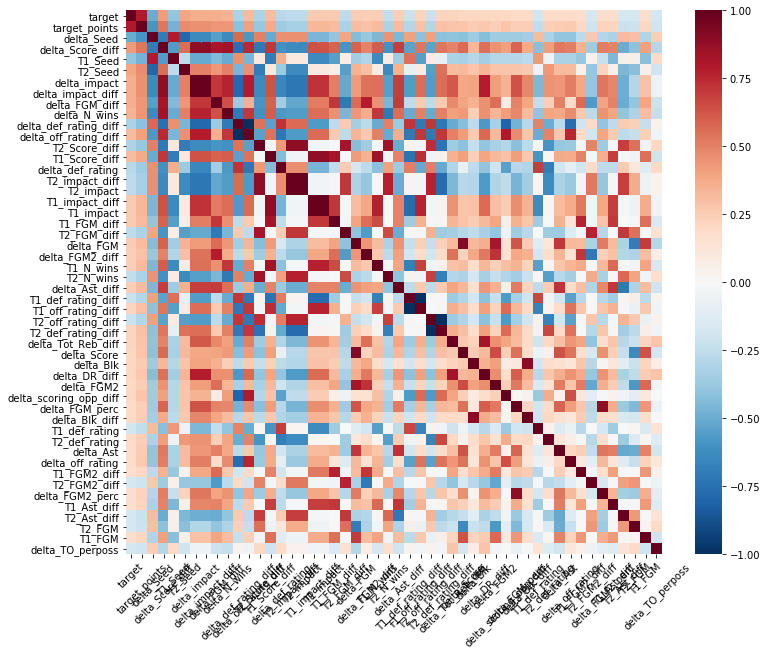

In [9]:
high_corr = exp.plot_correlations(df, target='target', limit=50)

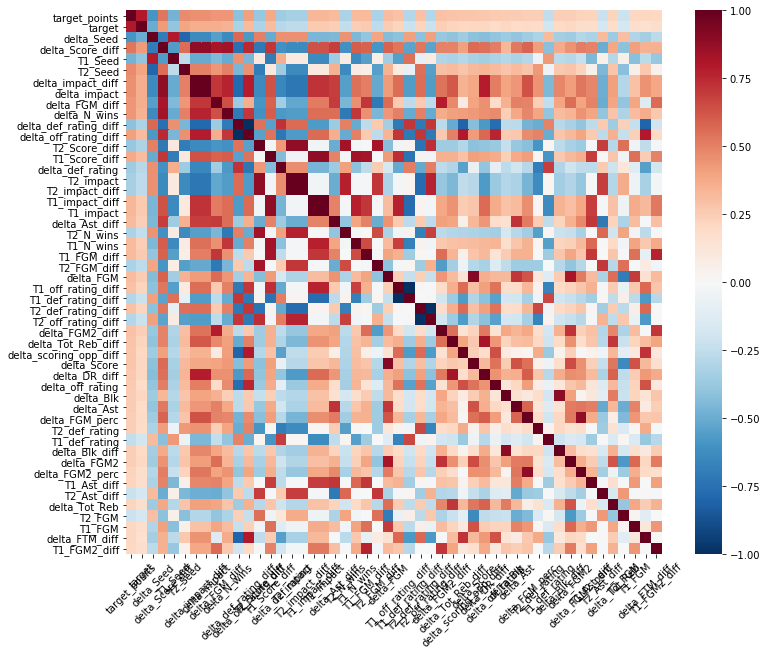

In [10]:
high_corr = exp.plot_correlations(df, target='target_points', limit=50)

                       delta_Seed  delta_Score_diff   T1_Seed   T2_Seed  \
delta_Seed               1.000000         -0.700769  0.793778 -0.793778   
delta_Score_diff        -0.700769          1.000000 -0.556255  0.556255   
T1_Seed                  0.793778         -0.556255  1.000000 -0.260167   
T2_Seed                 -0.793778          0.556255 -0.260167  1.000000   
delta_impact_diff       -0.639354          0.886687 -0.507505  0.507505   
delta_impact            -0.639354          0.886687 -0.507505  0.507505   
delta_FGM_diff          -0.551775          0.822440 -0.437987  0.437987   
delta_N_wins            -0.633142          0.841850 -0.502574  0.502574   
delta_def_rating_diff    0.571569         -0.755605  0.453699 -0.453699   
delta_off_rating_diff   -0.571569          0.755605 -0.453699  0.453699   
T2_Score_diff            0.502449         -0.716997  0.102134 -0.695533   
T1_Score_diff           -0.502449          0.716997 -0.695533  0.102134   
delta_def_rating         

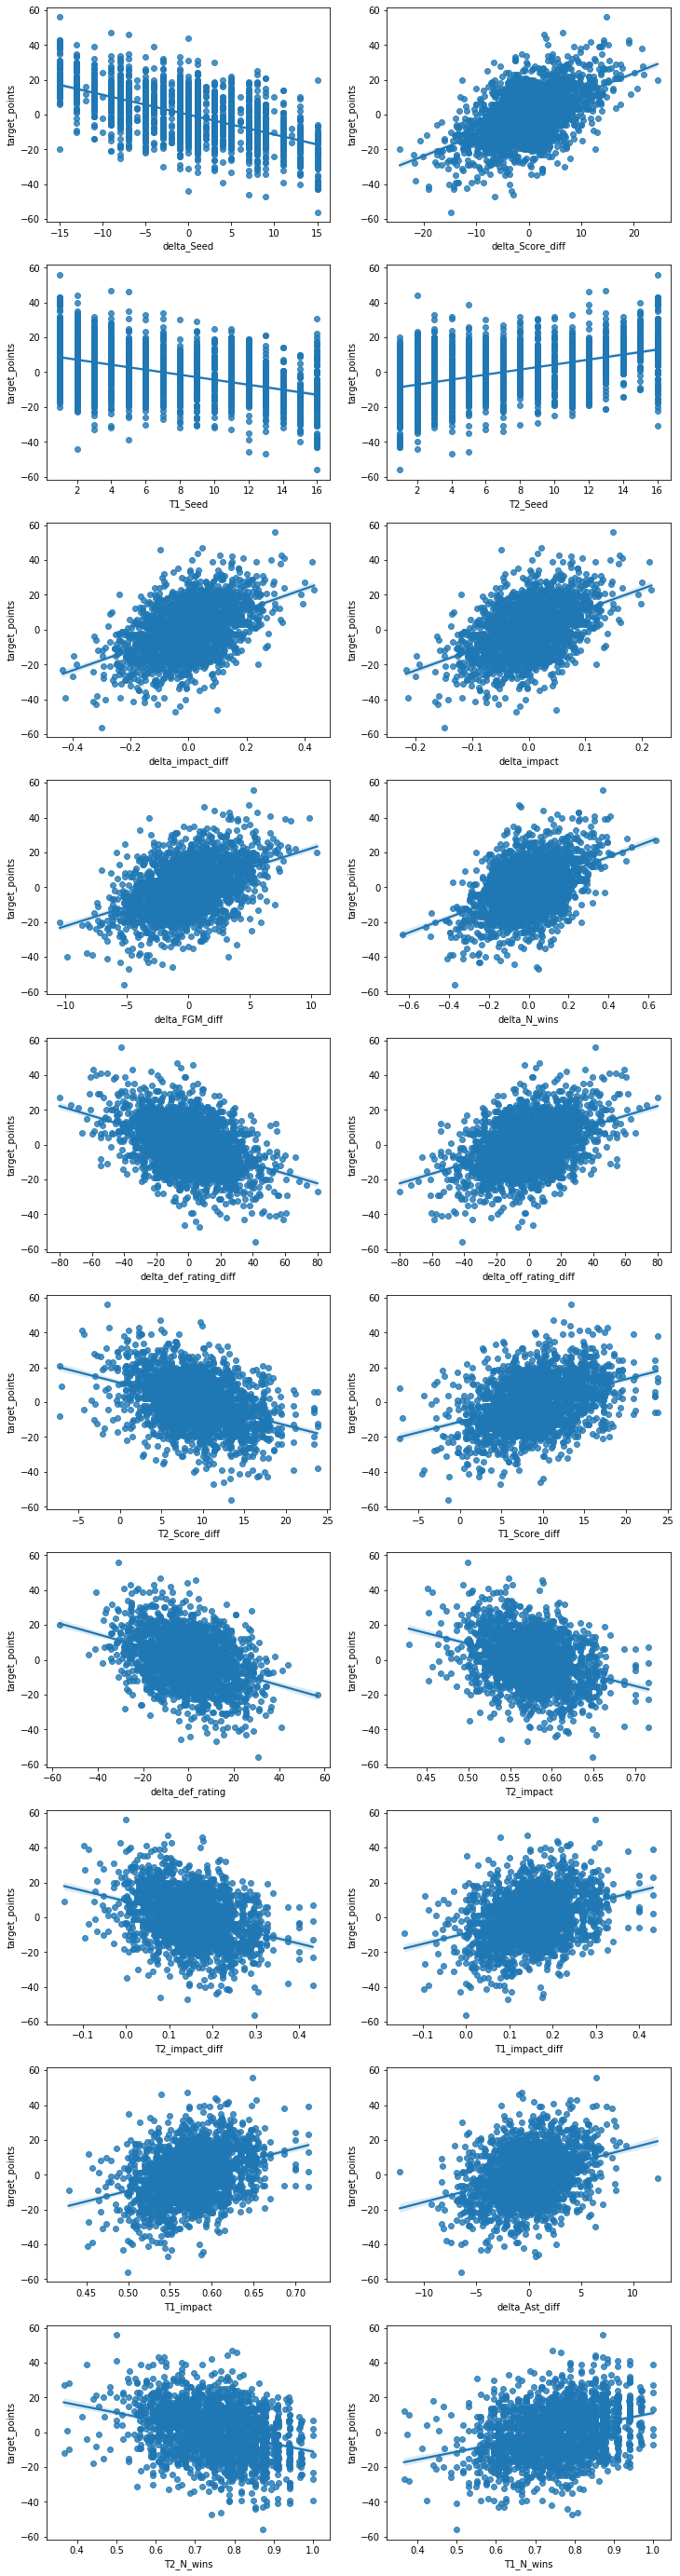

In [11]:
exp.corr_target(df, 'target_points', list(high_corr[2:22].index), x_estimator=None)

In [13]:
for col in [col for col in df if 'delta' in col]:
    df[f'sign_{col}'] = np.sign(df[col])

In [38]:
feats = []
scores = []

for col in [col for col in df if 'sign_' in col]:
    try:
        scores.append(df.groupby(col)['target'].mean()[1])
        feats.append(col)
    except KeyError:
        continue

segments = pd.DataFrame({'feat': feats, 'score': scores})
                      
segments.sort_values(by='score', ascending=False)

feat     score
26        sign_delta_Score_diff  0.660987
23            sign_delta_impact  0.652915
51       sign_delta_impact_diff  0.652915
27          sign_delta_FGM_diff  0.647217
52            sign_delta_N_wins  0.632110
40         sign_delta_FGM2_diff  0.613106
47   sign_delta_off_rating_diff  0.612556
1                sign_delta_FGM  0.598743
35          sign_delta_Ast_diff  0.598743
0              sign_delta_Score  0.593722
42      sign_delta_Tot_Reb_diff  0.592093
53          sign_delta_FGM_perc  0.587444
9                sign_delta_Ast  0.582063
34           sign_delta_DR_diff  0.578237
14              sign_delta_FGM2  0.578097
12               sign_delta_Blk  0.572457
19        sign_delta_off_rating  0.572197
38          sign_delta_Blk_diff  0.571557
16           sign_delta_Tot_Reb  0.571043
37          sign_delta_Stl_diff  0.570657
49  sign_delta_scoring_opp_diff  0.569507
7                 sign_delta_OR  0.565647
45      sign_delta_Reb_opp_diff  0.564126
31          sign_delta_FTM_diff  0.562050
2                sign_delta_FGA  0.560538
54         sign_delta_FGM2_perc  0.559641
32          sign_delta_FTA_diff  0.559641
15              sign_delta_FGA2  0.556951
11               sign_delta_Stl  0.555655
20       sign_delta_scoring_opp  0.554260
28          sign_delta_FGA_diff  0.547982
44   sign_delta_Def_effort_diff  0.546188
33           sign_delta_OR_diff  0.545291
29         sign_delta_FGM3_diff  0.543165
43   sign_delta_FGM_no_ast_diff  0.538669
17        sign_delta_FGM_no_ast  0.538185
8                 sign_delta_DR  0.535490
55         sign_delta_FGM3_perc  0.533632
41         sign_delta_FGA2_diff  0.530521
18       sign_delta_possessions  0.528251
3               sign_delta_FGM3  0.521114
24        sign_delta_Def_effort  0.517489
56           sign_delta_FT_perc  0.513901
30         sign_delta_FGA3_diff  0.511670
5                sign_delta_FTM  0.504488
4               sign_delta_FGA3  0.501795
6                sign_delta_FTA  0.500448
57   sign_delta_FGM_no_ast_perc  0.469955
25           sign_delta_Reb_opp  0.464574
50   sign_delta_TO_perposs_diff  0.460090
10                sign_delta_TO  0.450135
39           sign_delta_PF_diff  0.447935
46  sign_delta_possessions_diff  0.446637
13                sign_delta_PF  0.441150
21        sign_delta_TO_perposs  0.439462
36           sign_delta_TO_diff  0.434978
22        sign_delta_def_rating  0.399103
48   sign_delta_def_rating_diff  0.387444
58              sign_delta_Seed  0.286389